### Placeholder for Logging Temperatures in Pegasus 

In [1]:
#---Load Modules
% matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
import time
import schedule
import os
import subprocess
import random #--For testing only, remove for implementation

In [2]:
#---Assign directory & filename
log_dir = '/home/slawler'
log_file = 'Temperature.log'
log = os.path.join(log_dir,log_file)

#---Set Parameters
sample_rate = 1 #seconds
logger_rate = 60  #seconds
  
#---Delete all scheduled jobs
schedule.clear()

#---Placeholder for Sampling funciton. 
def job1():
    dtm  = datetime.now().strftime(format = '%d.%Y.%m %H:%M:%S')
    
    t1 = round(random.uniform(55,60),2)
    t2 = round(random.uniform(50,55),2)
    t3 = round(random.uniform(53,57),2)
    t4 = round(random.uniform(25,30),2)
    temps = str(t1)+'\t'+str(t2)+'\t'+str(t3)+'\t'+str(t4)
                                          
    with open(log,'a') as f: 
        f.write(dtm + '\t' + temps + '\n')   
    
    print("Time: {0}, Temperature (F): {1}".format(dtm, temps))

#---Placeholder for Logging funciton.    
def job2():
    print("Update Log")
    return('') 

#---Initialize Scheduler to call jobs
schedule.every(sample_rate).seconds.do(job1)

schedule.every(logger_rate).seconds.do(job2)

#---Run Jobs
while True:
    try:
        schedule.run_pending()
        time.sleep(1)
    except KeyboardInterrupt:
        print('Process Terminated')
        break

Time: 06.2016.11 18:11:14, Temperature (F): 58.67	50.46	53.9	25.86
Time: 06.2016.11 18:11:15, Temperature (F): 56.85	51.37	54.73	26.91
Time: 06.2016.11 18:11:16, Temperature (F): 58.56	53.35	53.79	29.14
Time: 06.2016.11 18:11:17, Temperature (F): 57.17	54.3	55.0	27.17
Time: 06.2016.11 18:11:18, Temperature (F): 56.49	52.33	56.04	26.69
Time: 06.2016.11 18:11:19, Temperature (F): 55.88	52.3	55.58	27.45
Time: 06.2016.11 18:11:20, Temperature (F): 58.73	50.86	56.63	28.85
Time: 06.2016.11 18:11:21, Temperature (F): 56.23	51.28	54.41	27.73
Time: 06.2016.11 18:11:22, Temperature (F): 56.84	53.42	54.12	26.92
Time: 06.2016.11 18:11:23, Temperature (F): 58.94	50.04	56.38	27.11
Time: 06.2016.11 18:11:24, Temperature (F): 59.15	53.9	55.27	26.6
Time: 06.2016.11 18:11:25, Temperature (F): 58.89	54.16	53.4	26.27
Time: 06.2016.11 18:11:26, Temperature (F): 55.7	54.08	56.99	27.75
Time: 06.2016.11 18:11:27, Temperature (F): 59.39	51.86	56.01	28.19
Time: 06.2016.11 18:11:28, Temperature (F): 57.95	51.62	

In [3]:
#--Plot Log

cols = ['time','Forward','Main','Aft','Outside']
df = pd.read_csv(log, sep = '\t', header = None, names = cols)
df['time'] = pd.to_datetime(df['time'],format = '%d.%Y.%m %H:%M:%S')
df = df.set_index(df['time'])
df.drop(labels='time',axis=1, inplace= True)
df.head()


,Forward,Main,Aft,Outside
time,,,,
2016-11-06 18:11:14,58.67,50.46,53.90,25.86
2016-11-06 18:11:15,56.85,51.37,54.73,26.91
2016-11-06 18:11:16,58.56,53.35,53.79,29.14
2016-11-06 18:11:17,57.17,54.30,55.00,27.17
2016-11-06 18:11:18,56.49,52.33,56.04,26.69


<IPython.core.display.Javascript object>


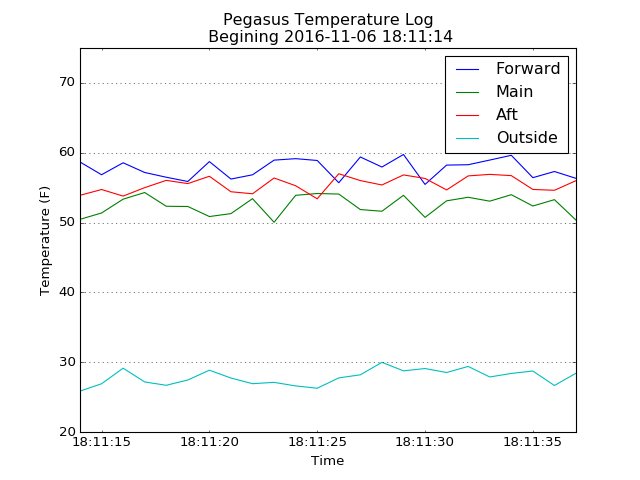

(20, 75)

In [4]:
df.plot(x = df.index, y = ['Forward','Main','Aft','Outside'])
plt.title('Pegasus Temperature Log'+ '\n Begining {}'.format(df.index[0]))
plt.ylabel('Temperature (F)')
plt.xlabel('Time')
plt.grid(True)
plt.ylim((20,75))